In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

ama_path = ("amazon_cells_labelled.txt")
ama = pd.read_csv(ama_path, delimiter= '\t', header=None)
ama.columns = ['message', 'rating']
print(ama)

                                               message  rating
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
5    I have to jiggle the plug to get it to line up...       0
6    If you have several dozen or several hundred c...       0
7          If you are Razr owner...you must have this!       1
8                  Needless to say, I wasted my money.       0
9                     What a waste of money and time!.       0
10                     And the sound quality is great.       1
11   He was very impressed when going from the orig...       1
12   If the two were seperated by a mere 5+ ft I st...       0
13                            Very good quality though       1
14   The design is very odd, as the ear "clip" is n... 

In [2]:
keywords = ['good', 'excellent', 'great', 'awesome', 'fine', 'highly', 'love']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    ama[str(key)] = ama.message.str.contains(
        str(key) + ' ',
        case=False
    )

In [3]:
print(ama)

                                               message  rating   good  \
0    So there is no way for me to plug it in here i...       0  False   
1                          Good case, Excellent value.       1   True   
2                               Great for the jawbone.       1  False   
3    Tied to charger for conversations lasting more...       0  False   
4                                    The mic is great.       1  False   
5    I have to jiggle the plug to get it to line up...       0  False   
6    If you have several dozen or several hundred c...       0  False   
7          If you are Razr owner...you must have this!       1  False   
8                  Needless to say, I wasted my money.       0  False   
9                     What a waste of money and time!.       0  False   
10                     And the sound quality is great.       1  False   
11   He was very impressed when going from the orig...       1  False   
12   If the two were seperated by a mere 5+ ft I st

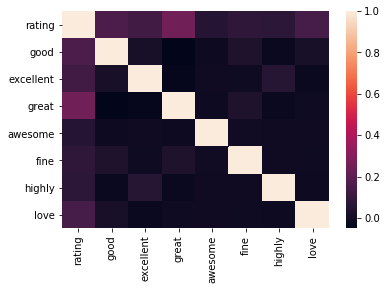

In [4]:
sns.heatmap(ama.corr())

In [5]:
newdata = ama[keywords]
target = ama['rating']
print(newdata)

      good  excellent  great  awesome   fine  highly   love
0    False      False  False    False  False   False  False
1     True       True  False    False  False   False  False
2    False      False   True    False  False   False  False
3    False      False  False    False  False   False  False
4    False      False  False    False  False   False  False
5    False      False  False    False  False   False  False
6    False      False  False    False  False   False  False
7    False      False  False    False  False   False  False
8    False      False  False    False  False   False  False
9    False      False  False    False  False   False  False
10   False      False  False    False  False   False  False
11   False      False  False    False  False   False  False
12   False      False  False    False  False   False  False
13    True      False  False    False  False   False  False
14   False      False  False    False  False   False  False
15   False      False  False    False  F

In [6]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(newdata, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [7]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(newdata)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    newdata.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 353


In [10]:
yelp_path = ("yelp_labelled.txt")
yelp = pd.read_csv(yelp_path, delimiter= '\t', header=None)
yelp.columns = ['message', 'rating']
print(yelp)

                                               message  rating
0                             Wow... Loved this place.       1
1                                   Crust is not good.       0
2            Not tasty and the texture was just nasty.       0
3    Stopped by during the late May bank holiday of...       1
4    The selection on the menu was great and so wer...       1
5       Now I am getting angry and I want my damn pho.       0
6                Honeslty it didn't taste THAT fresh.)       0
7    The potatoes were like rubber and you could te...       0
8                            The fries were great too.       1
9                                       A great touch.       1
10                            Service was very prompt.       1
11                                  Would not go back.       0
12   The cashier had no care what so ever on what I...       0
13   I tried the Cape Cod ravoli, chicken,with cran...       1
14   I was disgusted because I was pretty sure that... 

In [11]:
keywords = ['good', 'excellent', 'great', 'awesome', 'fine', 'highly', 'love']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.message.str.contains(
        str(key) + ' ',
        case=False
    )

ynewdata = yelp[keywords]
ytarget = yelp['rating']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(ynewdata, ytarget)

# Classify, storing the result in a new variable.
yy_pred = bnb.predict(ynewdata)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    ynewdata.shape[0],
    (ytarget != yy_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 388


I chose generic words to compare with the string and then used that to compare to the rating to tell if my assumption is correct. Overall the amount of mislabeled points is roughly the same between both data sets. 